# Model Performance and Evaluation Method : bankloan dataset

- Data
- Data Splitting
- Model Evaluation Benchmark
- Simple Hyperprameter Tuning
- Hyperparameter Tuning Grid Search

>### Data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bankloan = pd.read_csv('data/Data/bankloan.csv')
bankloan

,age,ed,employ,address,income,debtinc,creddebt,othdebt,default
0,41,3,17,12,176,9.3,11.359392,5.008608,1
1,27,1,10,6,31,17.3,1.362202,4.000798,0
2,40,1,15,14,55,5.5,0.856075,2.168925,0
3,41,1,15,14,120,2.9,2.658720,0.821280,0
4,24,2,2,0,28,17.3,1.787436,3.056564,1
...,...,...,...,...,...,...,...,...,...
695,36,2,6,15,27,4.6,0.262062,0.979938,1
696,29,2,6,4,21,11.5,0.369495,2.045505,0
697,33,1,15,3,32,7.6,0.491264,1.940736,0
698,45,1,19,22,77,8.4,2.302608,4.165392,0


>### Data Splitting

In [3]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score, precision_score

In [4]:
fitur = ['employ', 'debtinc', 'creddebt', 'othdebt']
target = ['default']

In [5]:
X = bankloan[fitur]
y = bankloan[target]

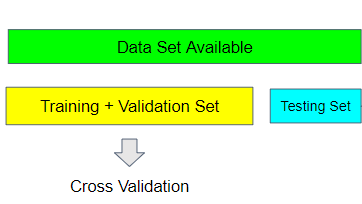

In [6]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((560, 4), (140, 4), (560, 1), (140, 1))

>### Model Evaluation: Benchmark

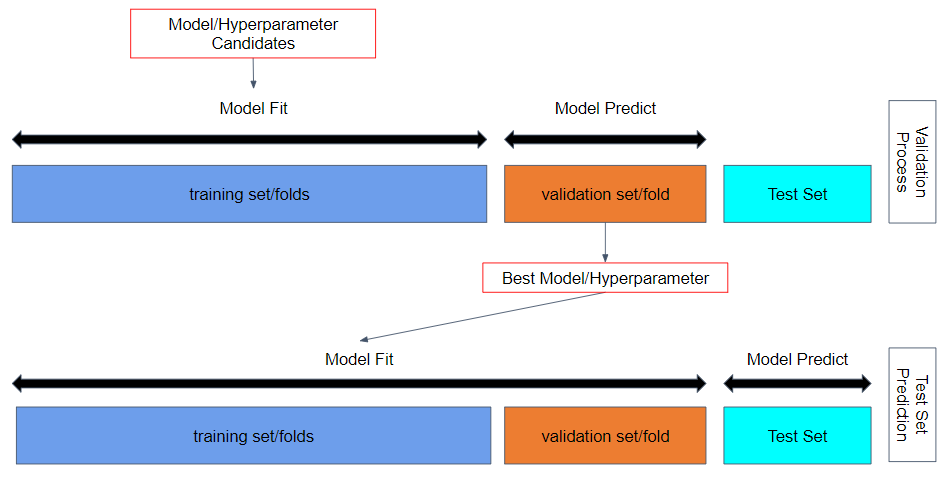

In [7]:
# Model Benchmark
logreg = LogisticRegression(solver='liblinear', random_state=2020)
knn = KNeighborsClassifier()
tree = DecisionTreeClassifier(criterion='entropy', max_depth=3)

In [8]:
from sklearn.model_selection import cross_val_score, StratifiedKFold
import warnings
warnings.filterwarnings('ignore')

### Accuracy

In [9]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv = cross_val_score(logreg, X_train_val, y_train_val, cv=skfold)
knn_cv = cross_val_score(knn, X_train_val, y_train_val, cv = skfold)
tree_cv = cross_val_score(tree, X_train_val, y_train_val, cv = skfold)

In [10]:
print('CV Logreg:', logreg_cv)
print('CV KNN:', knn_cv)
print('CV DTC:', tree_cv)

CV Logreg: [0.79464286 0.79464286 0.83928571 0.79464286 0.77678571]
CV KNN: [0.75       0.71428571 0.75892857 0.77678571 0.71428571]
CV DTC: [0.83035714 0.67857143 0.82142857 0.73214286 0.79464286]


In [11]:
print('CV Logreg:', logreg_cv.mean())
print('CV KNN:', knn_cv.mean())
print('CV DTC:', tree_cv.mean())

CV Logreg: 0.8
CV KNN: 0.7428571428571429
CV DTC: 0.7714285714285716


In [12]:
print('CV Logreg:', logreg_cv.std())
print('CV KNN:', knn_cv.std())
print('CV DTC:', tree_cv.std())

CV Logreg: 0.020824828195876083
CV KNN: 0.024872121923543065
CV DTC: 0.057753434388557956


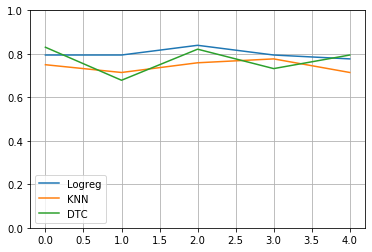

In [13]:
plt.plot(range(len(logreg_cv)), logreg_cv, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv, label='KNN')
plt.plot(range(len(tree_cv)), tree_cv, label='DTC')

plt.grid()
plt.ylim(0,1)
plt.legend()
plt.show()

### Recall

In [14]:
skfold = StratifiedKFold(n_splits=5)

logreg_cv_rc = cross_val_score(logreg, X_train_val, y_train_val, cv=skfold, scoring='recall')
knn_cv_rc = cross_val_score(knn, X_train_val, y_train_val, cv = skfold, scoring='recall')
tree_cv_rc = cross_val_score(tree, X_train_val, y_train_val, cv = skfold, scoring='recall')

In [15]:
print('CV Logreg:', logreg_cv_rc)
print('CV KNN:', knn_cv_rc)
print('CV DTC:', tree_cv_rc)

CV Logreg: [0.5        0.31034483 0.5862069  0.44827586 0.48275862]
CV KNN: [0.4        0.31034483 0.37931034 0.24137931 0.27586207]
CV DTC: [0.63333333 0.37931034 0.51724138 0.24137931 0.51724138]


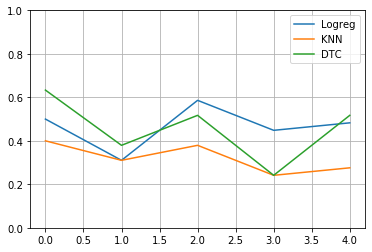

In [16]:
plt.plot(range(len(logreg_cv)), logreg_cv_rc, label='Logreg')
plt.plot(range(len(knn_cv)), knn_cv_rc, label='KNN')
plt.plot(range(len(tree_cv)), tree_cv_rc, label='DTC')

plt.grid()
plt.ylim(0,1)
plt.legend()
plt.show()

In [17]:
print('CV Logreg:', logreg_cv_rc.mean())
print('CV KNN:', knn_cv_rc.mean())
print('CV DTC:', tree_cv_rc.mean())

CV Logreg: 0.46551724137931033
CV KNN: 0.3213793103448276
CV DTC: 0.4577011494252874


In [18]:
print('CV Logreg:', logreg_cv_rc.std())
print('CV KNN:', knn_cv_rc.std())
print('CV DTC:', tree_cv_rc.std())

CV Logreg: 0.08992003317520893
CV KNN: 0.06021759987018779
CV DTC: 0.13481616986286768


### Flexible Metrics

In [19]:
skfold = StratifiedKFold(n_splits=5)
model = LogisticRegression(solver='liblinear', random_state=2020)
metric = 'f1'

def model_evaluation_cv(model, metric, fold):
    model_cv = cross_val_score(model, X_train_val, y_train_val, cv=skfold, scoring=metric)
    return model_cv

In [20]:
def print_result(model_cv):
    print('CV Score:', model_cv)
    print('CV Score  mean:', model_cv.mean())
    print('CV Score std:', model_cv.std())

In [21]:
model_cv = model_evaluation_cv(model, metric, skfold)
model_cv

array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])

In [22]:
print_result(model_cv)

CV Score: [0.56603774 0.43902439 0.65384615 0.53061224 0.52830189]
CV Score  mean: 0.543564482325905
CV Score std: 0.06927688261828344


### Cross Validate

In [23]:
from sklearn.model_selection import cross_validate
model_cv = cross_validate(model, X_train_val, y_train_val, cv=skfold, scoring=['precision', 'recall', 'accuracy', 'f1'])
model_cv

{'fit_time': array([0.02195549, 0.01097345, 0.00199032, 0.00302029, 0.00498128]),
 'score_time': array([0.01792669, 0.0099721 , 0.00499868, 0.00599647, 0.00299382]),
 'test_precision': array([0.65217391, 0.75      , 0.73913043, 0.65      , 0.58333333]),
 'test_recall': array([0.5       , 0.31034483, 0.5862069 , 0.44827586, 0.48275862]),
 'test_accuracy': array([0.79464286, 0.79464286, 0.83928571, 0.79464286, 0.77678571]),
 'test_f1': array([0.56603774, 0.43902439, 0.65384615, 0.53061224, 0.52830189])}

In [24]:
cv_df = pd.DataFrame(model_cv, index=[f'fold_{x}' for x in range(1,6)])
cv_df

,fit_time,score_time,test_precision,test_recall,test_accuracy,test_f1
fold_1,0.021955,0.017927,0.652174,0.500000,0.794643,0.566038
fold_2,0.010973,0.009972,0.750000,0.310345,0.794643,0.439024
fold_3,0.001990,0.004999,0.739130,0.586207,0.839286,0.653846
fold_4,0.003020,0.005996,0.650000,0.448276,0.794643,0.530612
fold_5,0.004981,0.002994,0.583333,0.482759,0.776786,0.528302


In [25]:
cv_df['test_precision'].std

<bound method NDFrame._add_numeric_operations.<locals>.std of fold_1    0.652174
fold_2    0.750000
fold_3    0.739130
fold_4    0.650000
fold_5    0.583333
Name: test_precision, dtype: float64>

### Model Performance in Test Set

In [26]:
model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [27]:
model.fit(X_train_val, y_train_val)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=2020, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [28]:
y_pred = model.predict(X_test)

In [29]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In [30]:
# precision (+)
precision_score(y_test, y_pred, pos_label=1)

0.782608695652174

In [31]:
# precision (-)
precision_score(y_test, y_pred, pos_label=0)

0.8376068376068376

In [32]:
# macro = (precision_0 + precision_1) / 2

(0.84+0.78)/2

0.81

In [33]:
# weighted = 
((103/140) * 0.84) + ((37/140) * 0.78)

0.8241428571428572

In [34]:
from sklearn.metrics import plot_roc_curve, plot_precision_recall_curve, roc_auc_score, roc_curve

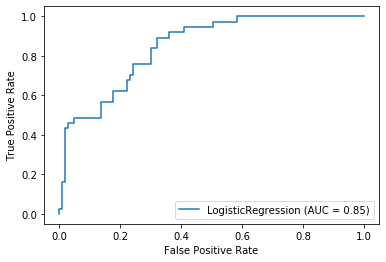

In [35]:
plot_roc_curve(model, X_test, y_test)
plt.show()

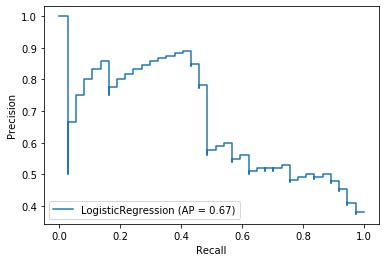

In [36]:
plot_precision_recall_curve(model, X_test, y_test);

In [37]:
y_prob1 = model.predict_proba(X_test)[:,1]
y_prob1
roc_auc_score(y_test, y_prob1)

0.8475465757019154

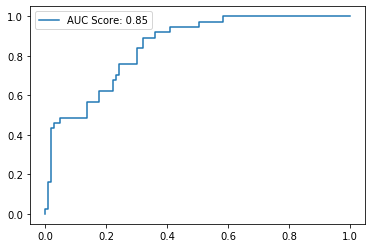

In [38]:
fpr, tpr, thr = roc_curve(y_test, y_prob1)
plt.plot(fpr, tpr)
plt.legend([f'AUC Score: {round(roc_auc_score(y_test, y_prob1), 2)}']);

In [39]:
roc_df = pd.DataFrame({'fpr': fpr, 'tpr': tpr, 'thr': thr})
roc_df.head()

,fpr,tpr,thr
0,0.000000,0.000000,1.945205
1,0.000000,0.027027,0.945205
2,0.009709,0.027027,0.934398
3,0.009709,0.162162,0.733896
4,0.019417,0.162162,0.691082


In [40]:
y_pred = model.predict(X_test)
prob_df = pd.DataFrame({'prob_1': y_prob1, 'y_test': y_test['default'], 'y_pred': y_pred})
prob_df

,prob_1,y_test,y_pred
118,0.591712,1,1
309,0.314290,0,0
339,0.310958,1,0
686,0.409367,0,0
639,0.240005,0,0
...,...,...,...
597,0.543320,1,1
58,0.012267,0,0
467,0.106504,0,0
148,0.060814,0,0


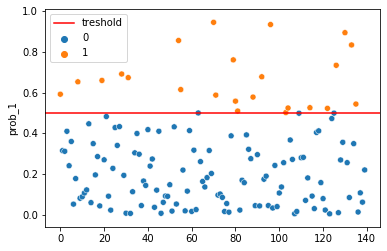

In [41]:
sns.scatterplot(x=range(len(prob_df)), y=prob_df['prob_1'], hue=prob_df['y_pred'])

plt.axhline(0.5, color='red', label='treshold')
plt.legend()
plt.show()

>## Hypertparameter Tuning Grid Search

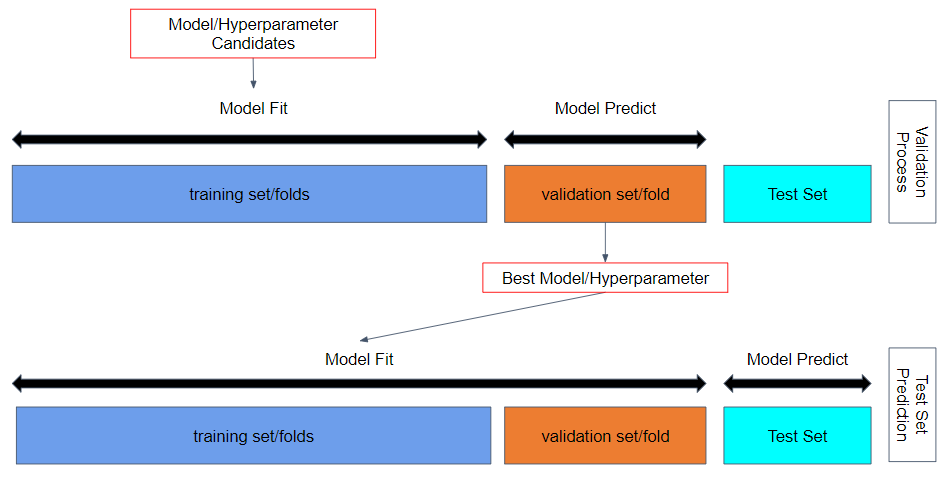

In [42]:
from sklearn.model_selection import GridSearchCV

In [43]:
logreg_bench = LogisticRegression()

hyperparam_space = {
    'C':[1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001], # benck mark 1 C = 1 bench mark 2 C = 0.05
    'max_iter':[100, 200, 300, 400, 500, 1000] # bench mark max_iter = 100
}

1. C  15 hyperparameters
1. max_iter 6 15 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 15*6*5 = 450 times 

In [44]:
skfold = StratifiedKFold(n_splits=5)

grid_search = GridSearchCV(
    logreg_bench, 
    param_grid = hyperparam_space,
    cv = skfold,
    scoring = 'recall',
    verbose = 1,
    n_jobs = -1
)

In [45]:
grid_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:   10.1s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=-1,
             param_grid={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5, 0.1, 0.05,
                               0.01, 0.005, 0.001, 0.0005, 0.0001],
                         'max_iter': [100, 200, 300, 400, 500, 1000]},
             pre_dispatch='2*n_jobs', refit=True, return_train_sc

In [46]:
print('best recall score: ', grid_search.best_score_)
print('best best score: ', grid_search.best_params_)
print('best best estimator: ', grid_search.best_estimator_)

best recall score:  0.4724137931034482
best best score:  {'C': 1000, 'max_iter': 100}
best best estimator:  LogisticRegression(C=1000, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [47]:
pd.DataFrame(grid_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_max_iter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.082628,0.054466,0.006473,0.004379,1000,100,"{'C': 1000, 'max_iter': 100}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
1,0.034906,0.010033,0.008180,0.007090,1000,200,"{'C': 1000, 'max_iter': 200}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
2,0.070533,0.011768,0.008772,0.005436,1000,300,"{'C': 1000, 'max_iter': 300}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
3,0.043695,0.015392,0.005572,0.000804,1000,400,"{'C': 1000, 'max_iter': 400}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
4,0.050063,0.003699,0.003993,0.001553,1000,500,"{'C': 1000, 'max_iter': 500}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.023734,0.008475,0.004786,0.002307,0.0001,200,"{'C': 0.0001, 'max_iter': 200}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
86,0.023737,0.009469,0.004989,0.001261,0.0001,300,"{'C': 0.0001, 'max_iter': 300}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
87,0.033514,0.012437,0.005583,0.002568,0.0001,400,"{'C': 0.0001, 'max_iter': 400}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
88,0.034512,0.016942,0.005183,0.002631,0.0001,500,"{'C': 0.0001, 'max_iter': 500}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85


>## Final Result Comparison: Hyperparameter Tuning Grid Search

In [48]:
logreg = LogisticRegression(solver = 'liblinear')
logreg.fit(X_train_val,y_train_val)
y_pred = logreg.predict(X_test)
print(classification_report(y_test,y_pred))


              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



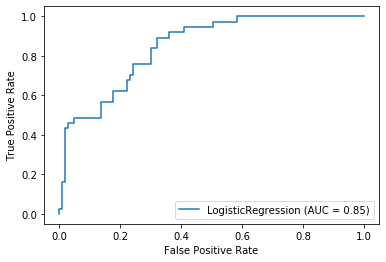

In [49]:
plot_roc_curve(logreg, X_test, y_test);

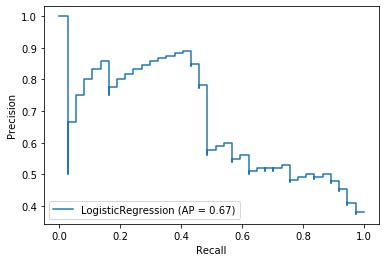

In [50]:
plot_precision_recall_curve(logreg, X_test, y_test);

In [51]:
# model tuned
logreg_tuned = grid_search.best_estimator_
logreg_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = logreg_tuned.predict(X_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89       103
           1       0.78      0.49      0.60        37

    accuracy                           0.83       140
   macro avg       0.81      0.72      0.75       140
weighted avg       0.82      0.83      0.81       140



In term of f1 score, your model performance decrease after hyperparameter tuning. This can be happen because :
1. the improvement in the cross validation score is insignificant
1. your choice of hyperparameter resulted in overfitting/unstable model

Solution :
1. changes the model
1. more feature engineering
1. add another hyperprameter, (we aleready try this, either try again or try 1 or 2)

In [52]:
from sklearn.model_selection import RandomizedSearchCV

In [53]:
random_search = RandomizedSearchCV(
    logreg_bench, 
    param_distributions = hyperparam_space,
    n_iter = 100,
    cv = skfold,
    scoring = 'recall',
    verbose = 1,
    n_jobs = -1
)

In [54]:
random_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 90 candidates, totalling 450 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done 128 tasks      | elapsed:    1.2s
[Parallel(n_jobs=-1)]: Done 450 out of 450 | elapsed:    4.3s finished


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=-1,
                   param_distributions={'C': [1000, 500, 100, 50, 10, 5, 1, 0.5,
                                              0.1, 0.05, 0.01, 0.005, 0.001,
                                             

In [55]:
pd.DataFrame(random_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_iter,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.030122,0.011756,0.004586,0.002723,100,1000,"{'max_iter': 100, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
1,0.038497,0.010790,0.006587,0.004581,200,1000,"{'max_iter': 200, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
2,0.031117,0.012350,0.005024,0.002673,300,1000,"{'max_iter': 300, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
3,0.023832,0.001912,0.004399,0.001484,400,1000,"{'max_iter': 400, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
4,0.037131,0.022870,0.008175,0.004158,500,1000,"{'max_iter': 500, 'C': 1000}",0.5,0.344828,0.586207,0.448276,0.482759,0.472414,0.078330,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,0.030542,0.009321,0.006883,0.002653,200,0.0001,"{'max_iter': 200, 'C': 0.0001}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
86,0.028857,0.005586,0.003761,0.000704,300,0.0001,"{'max_iter': 300, 'C': 0.0001}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
87,0.040495,0.014968,0.011279,0.004879,400,0.0001,"{'max_iter': 400, 'C': 0.0001}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85
88,0.030448,0.010931,0.006783,0.004735,500,0.0001,"{'max_iter': 500, 'C': 0.0001}",0.0,0.068966,0.034483,0.000000,0.000000,0.020690,0.027586,85


# Algorithm Chains : adult dataset
>## Data

In [56]:
!pip install category_encoders

In [57]:
from sklearn.tree import DecisionTreeClassifier

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import f1_score, recall_score, precision_score

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
import category_encoders as ce
from sklearn.pipeline import Pipeline


In [58]:
df_adult = pd.read_csv('data/Data/adult.csv')
df_adult.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [59]:
df_adult.replace('?', np.nan, inplace=True)

In [60]:
df_adult.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64

In [61]:
df_adult[['workclass', 'occupation', 'native.country']].head(1)

,workclass,occupation,native.country
0,NaN,NaN,United-States


>## Preprocessing

- Workclass:
    - Imputation: most-frequent/Private
    - Binary Encoding
- Occupation:
    - Imputation: most-frequent / Prof-specialty
    - Binary Encoding
- Native Country:
    - Imputation: most-frequent / United-States
    - Binary Encoding
- Marital, Relationship, Race, Sex:
    - One Hot Encoding

In [62]:
workclass_pipeline = Pipeline([
    ('imputer_wc', SimpleImputer(strategy='most_frequent')),
    ('binary_wc', ce.BinaryEncoder()),
])

occupation_pipeline = Pipeline([
    ('imputer_oc', SimpleImputer(strategy='most_frequent')),
    ('binary_oc', ce.BinaryEncoder()),
])

native_pipeline = Pipeline([
    ('imputer_nc', SimpleImputer(strategy='constant', fill_value='United-States')),
    ('binary_nc', ce.BinaryEncoder()),
])

transformer = ColumnTransformer([
    ('workclass_transform', workclass_pipeline, ['workclass']),
    ('occupation_transform', occupation_pipeline, ['occupation']),
    ('native_transform', native_pipeline, ['native.country']),
    ('one_hot_encoder', OneHotEncoder(drop='first'), ['marital.status', 'relationship', 'race', 'sex'])
], remainder = 'passthrough')

>## Data Splitting

In [63]:
X = df_adult.drop(columns=['fnlwgt', 'income', 'education'])
y = np.where(df_adult['income']=='>50K', 1, 0)

In [64]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X,
    y,
    stratify = y, 
    random_state = 2020)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

NameError: name 'X_train' is not defined

In [65]:
tree = DecisionTreeClassifier(max_depth=5, random_state=2020)

estimator = Pipeline([
    ('preprocess', transformer),
    ('clf', tree)
])

In [66]:
model_cv = cross_val_score(estimator, X_train_val, y_train_val, scoring = 'f1')

In [67]:
model_cv

array([0.58780992, 0.63417085, 0.60612351, 0.64115308, 0.62022704])

In [68]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [0.58780992 0.63417085 0.60612351 0.64115308 0.62022704]
CV score mean 0.6178968798729898
CV score std 0.019261154653167665


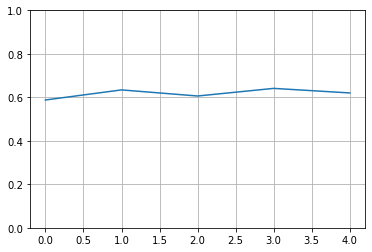

In [69]:
plt.plot(range(len(model_cv)), model_cv)
plt.grid()
plt.ylim(0,1)
plt.show()

In [70]:
logreg = LogisticRegression(random_state=2020)

logreg_pipeline = Pipeline([
    ('preprocess', transformer),
    ('clf', logreg)
])

logreg_cv = cross_val_score(logreg_pipeline, X_train_val, y_train_val, scoring='f1', verbose=1)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    3.2s finished


In [71]:
print('CV score',logreg_cv)
print('CV score mean',logreg_cv.mean())
print('CV score std',logreg_cv.std())

CV score [nan nan nan nan nan]
CV score mean nan
CV score std nan


>## Hyperparameter Tuning

In [72]:
# estimator (DTC)
estimator

Pipeline(memory=None,
         steps=[('preprocess',
                 ColumnTransformer(n_jobs=None, remainder='passthrough',
                                   sparse_threshold=0.3,
                                   transformer_weights=None,
                                   transformers=[('workclass_transform',
                                                  Pipeline(memory=None,
                                                           steps=[('imputer_wc',
                                                                   SimpleImputer(add_indicator=False,
                                                                                 copy=True,
                                                                                 fill_value=None,
                                                                                 missing_values=nan,
                                                                                 strategy='most_frequent',
                              

In [73]:
estimator.get_params()

{'memory': None,
 'steps': [('preprocess',
   ColumnTransformer(n_jobs=None, remainder='passthrough', sparse_threshold=0.3,
                     transformer_weights=None,
                     transformers=[('workclass_transform',
                                    Pipeline(memory=None,
                                             steps=[('imputer_wc',
                                                     SimpleImputer(add_indicator=False,
                                                                   copy=True,
                                                                   fill_value=None,
                                                                   missing_values=nan,
                                                                   strategy='most_frequent',
                                                                   verbose=0)),
                                                    ('binary_wc',
                                                     BinaryEncoder(co

In [74]:
hyperparam_space = {
    'clf__criterion': ['gini', 'entropy'],
    'clf__max_depth': [5,10,15,20],
    'clf__min_samples_split': [5,6,7,8]
}

grid_search_dtc = GridSearchCV(
    estimator,
    param_grid = hyperparam_space,
    cv = StratifiedKFold(),
    scoring = 'f1',
    n_jobs = -1,
    verbose = 1
)

In [75]:
grid_search_dtc.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   12.3s
[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:   42.6s finished


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=Pipeline(memory=None,
                                steps=[('preprocess',
                                        ColumnTransformer(n_jobs=None,
                                                          remainder='passthrough',
                                                          sparse_threshold=0.3,
                                                          transformer_weights=None,
                                                          transformers=[('workclass_transform',
                                                                         Pipeline(memory=None,
                                                                                  steps=[('imputer_wc',
                                                                                          SimpleImputer(add_indicator...
                                                          

In [76]:
estimator.fit(X_train_val, y_train_val)
y_pred_bench = estimator.predict(X_test)

In [77]:
y_pred_bench

array([0, 0, 0, ..., 0, 0, 0])

In [78]:
print(classification_report(y_test, y_pred_bench))

              precision    recall  f1-score   support

           0       0.86      0.96      0.91      6181
           1       0.79      0.51      0.62      1960

    accuracy                           0.85      8141
   macro avg       0.83      0.74      0.77      8141
weighted avg       0.84      0.85      0.84      8141



In [79]:
estimator_tuned = grid_search_dtc.best_estimator_
estimator_tuned.fit(X_train_val, y_train_val)
y_pred_tuned = estimator_tuned.predict(X_test)

print(classification_report(y_test, y_pred_tuned))

              precision    recall  f1-score   support

           0       0.89      0.92      0.91      6181
           1       0.71      0.66      0.69      1960

    accuracy                           0.85      8141
   macro avg       0.80      0.79      0.80      8141
weighted avg       0.85      0.85      0.85      8141



In [80]:
precision, recall, thr = precision

NameError: name 'precision' is not defined

# Regression

In [148]:
import seaborn as sns
tips = sns.load_dataset('tips')

In [149]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


>## Data Splitting

In [150]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

In [151]:
X = pd.get_dummies(tips.drop('tip', axis = 1))
y = tips['tip']

In [152]:
X_train_val, X_test, y_train_val, y_test = train_test_split(
    X, 
    y,
    test_size = 0.2, 
    random_state = 2020)

In [153]:
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5, random_state = 2020)
linreg = LinearRegression()

In [142]:
from sklearn.metrics import SCORERS

In [143]:
SCORERS

{'explained_variance': make_scorer(explained_variance_score),
 'r2': make_scorer(r2_score),
 'max_error': make_scorer(max_error, greater_is_better=False),
 'neg_median_absolute_error': make_scorer(median_absolute_error, greater_is_better=False),
 'neg_mean_absolute_error': make_scorer(mean_absolute_error, greater_is_better=False),
 'neg_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False),
 'neg_mean_squared_log_error': make_scorer(mean_squared_log_error, greater_is_better=False),
 'neg_root_mean_squared_error': make_scorer(mean_squared_error, greater_is_better=False, squared=False),
 'neg_mean_poisson_deviance': make_scorer(mean_poisson_deviance, greater_is_better=False),
 'neg_mean_gamma_deviance': make_scorer(mean_gamma_deviance, greater_is_better=False),
 'accuracy': make_scorer(accuracy_score),
 'roc_auc': make_scorer(roc_auc_score, needs_threshold=True),
 'roc_auc_ovr': make_scorer(roc_auc_score, needs_proba=True, multi_class=ovr),
 'roc_auc_ovo': make_sc

In [144]:
cross_val_score

<function sklearn.model_selection._validation.cross_val_score(estimator, X, y=None, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)>

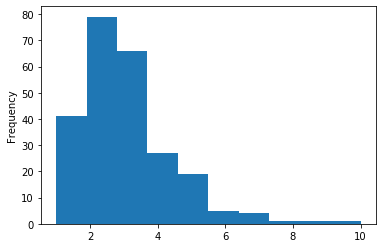

In [145]:
y.plot(kind='hist');

In [154]:
tree_cv = cross_val_score(tree, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [155]:
print('CV Score:', tree_cv)
print('CV Score mean:', tree_cv.mean())
print('CV Score std:', tree_cv.std())

CV Score: [-1.0686013  -0.97814478 -1.77873212 -1.19898146 -1.19188762]
CV Score mean: -1.2432694552627068
CV Score std: 0.28004351146399903


In [164]:
model_cv = cross_val_score(linreg, X_train_val, y_train_val, scoring = 'neg_mean_squared_error')

In [165]:
print('CV score',model_cv)
print('CV score mean',model_cv.mean())
print('CV score std',model_cv.std())

CV score [-0.87304358 -0.84277215 -1.05989713 -1.77937311 -1.10502143]
CV score mean -1.1320214803006685
CV score std 0.33933163195266225


### MODEL PERFORMANCE (TREE)

In [166]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5)
tree.fit(X_train_val, y_train_val)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=5,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

In [167]:
y_pred = tree.predict(X_test)

In [168]:
print(mean_squared_error(y_test, y_pred))

1.186105171396164


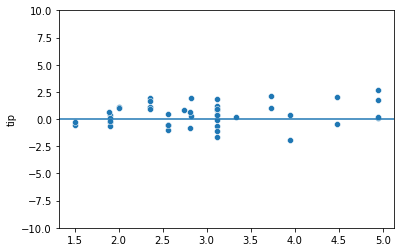

In [169]:
residuals = y_test - y_pred
sns.scatterplot(y_pred, residuals)
plt.axhline(0)
plt.ylim(-10, 10)
plt.show()

>## Hypermarameter Tuning (Tree)

In [160]:
tree.get_params()

{'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': None,
 'splitter': 'best'}

In [170]:
hyperparam_space = {
    'min_samples_leaf': [1,5,10,15,20,50],
    'max_depth': [2,3,4,5,6,7],
    'criterion': ['mae', 'mse']
}

1. min_samples_leaf  6 hyperparameters
1. max_depht 5 hyperparameters
1. criterion 2 hyperparameters
1. CV 5 fold
<br>
so, this step will train model 6*5*2*5 = 300 times 

In [174]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)

randomized_search = RandomizedSearchCV(
    tree,
    param_distributions = hyperparam_space,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state = 2020,
    n_jobs = -1,
    verbose = 1
)

In [175]:
randomized_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:    3.6s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.3s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=DecisionTreeRegressor(ccp_alpha=0.0,
                                                   criterion='mse', max_depth=5,
                                                   max_features=None,
                                                   max_leaf_nodes=None,
                                                   min_impurity_decrease=0.0,
                                                   min_impurity_split=None,
                                                   min_samples_leaf=1,
                                                   min_samples_split=2,
                                                   min_weight_fraction_leaf=0.0,
                                                   presort='deprecated',
                                                   random_state=2020,
                                                   splitter='best'),
                   iid='deprecated', n_iter=20, n_jobs=-1,
                   p

In [176]:
print('best score',randomized_search.best_score_)
print('best param',randomized_search.best_params_)

best score -0.925876794871795
best param {'min_samples_leaf': 1, 'max_depth': 4, 'criterion': 'mae'}


In [177]:
pd.DataFrame(randomized_search.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.009774,0.010105,0.002990,0.001259,1,2,mse,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.816130,-0.882642,-1.424336,-1.108872,-0.924132,-1.031222,0.219261,2
1,0.012432,0.005754,0.004823,0.002002,5,7,mae,"{'min_samples_leaf': 5, 'max_depth': 7, 'crite...",-1.006229,-0.634501,-1.063513,-2.466231,-1.163880,-1.266871,0.625820,9
2,0.007980,0.001668,0.002992,0.001668,5,4,mae,"{'min_samples_leaf': 5, 'max_depth': 4, 'crite...",-0.976212,-0.617748,-1.311423,-2.242045,-1.122054,-1.253896,0.543861,8
3,0.006271,0.002415,0.002390,0.000798,20,2,mse,"{'min_samples_leaf': 20, 'max_depth': 2, 'crit...",-0.932366,-0.822205,-1.311943,-1.802645,-1.271212,-1.228074,0.343860,7
4,0.005398,0.001036,0.003191,0.001169,5,2,mse,"{'min_samples_leaf': 5, 'max_depth': 2, 'crite...",-1.111161,-0.880120,-1.234215,-2.300130,-1.401683,-1.385462,0.487928,16
5,0.004888,0.000802,0.002594,0.000798,50,7,mae,"{'min_samples_leaf': 50, 'max_depth': 7, 'crit...",-0.852846,-0.866010,-1.368379,-2.420846,-1.624323,-1.426481,0.578699,19
6,0.005984,0.000001,0.001995,0.000631,1,4,mae,"{'min_samples_leaf': 1, 'max_depth': 4, 'crite...",-0.847590,-0.768338,-1.064804,-1.089531,-0.859121,-0.925877,0.127661,1
7,0.006982,0.001894,0.002991,0.001785,5,3,mae,"{'min_samples_leaf': 5, 'max_depth': 3, 'crite...",-0.797654,-0.655642,-1.358672,-2.269215,-1.005492,-1.217335,0.576704,6
8,0.005586,0.002326,0.003192,0.001466,20,4,mse,"{'min_samples_leaf': 20, 'max_depth': 4, 'crit...",-0.870686,-0.765451,-1.294051,-1.731356,-1.297124,-1.191733,0.345704,4
9,0.005784,0.000746,0.001796,0.000399,1,2,mae,"{'min_samples_leaf': 1, 'max_depth': 2, 'crite...",-0.738330,-0.851707,-1.323954,-1.509013,-1.356648,-1.155931,0.303358,3


>## Final Result COmparison

In [178]:
# Before
tree = DecisionTreeRegressor(criterion = 'mse', max_depth = 5)
tree.fit(X_train_val,y_train_val)
y_pred = tree.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.222193309151266


In [179]:
# After
tree_final = randomized_search.best_estimator_
tree_final.fit(X_train_val,y_train_val)
y_pred = tree_final.predict(X_test)
print(mean_squared_error(y_test,y_pred))

1.2883204081632653


# Algorithm Chain Regression

In [182]:
X = tips.drop('tip', axis=1)
y = tips['tip']

In [184]:
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=2020)
X_train_val.shape, X_test.shape, y_train_val.shape, y_test.shape

((195, 6), (49, 6), (195,), (49,))

In [188]:
X_train_val.select_dtypes(include='category').describe()

,sex,smoker,day,time
count,195,195,195,195
unique,2,2,4,2
top,Male,No,Sat,Dinner
freq,123,123,66,138


In [190]:
from sklearn.feature_selection import RFE

In [191]:
transformer = ColumnTransformer([
    ('onehot', OneHotEncoder(drop='first'), 'sex smoker day time'.split())
], remainder='passthrough')

dtr_pipeline = Pipeline([
    ('transformer', transformer),
    ('selection', RFE(estimator=tree)),
    ('dtr', tree)
])

In [193]:
dtr_pipeline_cv = cross_val_score(dtr_pipeline, X_train_val, y_train_val, scoring='neg_mean_squared_error')

In [194]:
print('score:', dtr_pipeline_cv)
print('score mean:', dtr_pipeline_cv.mean())
print('score std:', dtr_pipeline_cv.std())

score: [-1.10061928 -1.03282135 -1.44631257 -1.05011606 -1.27467484]
score mean: -1.1809088169982231
score std: 0.15793306826145537


In [195]:
hyperparam_space = {
    'dtr__min_samples_leaf': [1,5,10,15,20,50],
    'dtr__max_depth': [2,3,4,5,6,7],
    'dtr__criterion': ['mae', 'mse'],
    'transformer__onehot__drop': ['first', None]
}

In [197]:
tree = DecisionTreeRegressor(criterion='mse', max_depth=5, random_state=2020)

randomized_search = RandomizedSearchCV(
    dtr_pipeline,
    param_distributions = hyperparam_space,
    n_iter = 20,
    cv = 5,
    scoring = 'neg_mean_squared_error',
    random_state = 2020,
    n_jobs = -1,
    verbose = 1
)

In [198]:
randomized_search.fit(X_train_val, y_train_val)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  56 tasks      | elapsed:    4.5s
[Parallel(n_jobs=-1)]: Done  93 out of 100 | elapsed:    4.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    4.9s finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=Pipeline(memory=None,
                                      steps=[('transformer',
                                              ColumnTransformer(n_jobs=None,
                                                                remainder='passthrough',
                                                                sparse_threshold=0.3,
                                                                transformer_weights=None,
                                                                transformers=[('onehot',
                                                                               OneHotEncoder(categories='auto',
                                                                                             drop='first',
                                                                                             dtype=<class 'numpy.float64'>,
                                                                        

In [200]:
dtr_pipe_tuned = randomized_search.best_estimator_.fit(X_train_val, y_train_val)
y_pred_pipe_tuned = dtr_pipe_tuned.predict(X_test)
print(mean_squared_error(y_test, y_pred_pipe_tuned))

1.5648724489795918
